<a href="https://colab.research.google.com/github/javierjones/telecom-analysis/blob/main/notebooks/S7_Version_Estudiante_Project_ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# cargar archivos
plans = pd.read_csv('datasets/plans.csv')
users = pd.read_csv('datasets/users_latam.csv')
usage = pd.read_csv('datasets/usage.csv')

In [8]:
display(plans.head(5))

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [9]:
display(users.head(5))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [10]:
display(usage.head(5))

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [11]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [12]:
print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 260.0+ bytes
None


In [13]:
# inspección de users con .info()
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB
None


In [14]:
# inspección de usage con .info()
print(usage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB
None


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [15]:
# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())


user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [16]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())


id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64





✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

-----------------------------------------

**Diagnóstico de valores nulos en users**

city (11.7% nulos)
Tiene un porcentaje intermedio (entre 5% Y 30%). Recomiendo revisar la distribución por pais o por plan y mirar si es algo que se pueda imputar si es algo importante para la segmentación. Sino afecta el análisis principal, se puede mantener como NA.

churn_date (88.35%)
Tiene un porcentaje de nulos de más del 80%.  Debido a que churn_date representa si el usuario ha cancelado el plan, es posible que la mayoria de usuarios aun se encuentren activos y por eso el alto porcentaje de nulos, así que no es un problema de calidad sino de característica del negocio. Recomiendo crear un campo flag para marcar los usuarios con y sin fecha para posterior segmentación.

Las otras columnas de users estan completas.

**Diagnóstico de valores nulos en usage**

date (0.21% nulos)
Porcentaje muy bajo (<5%). Recomiendo eliminar esos registros ya que son pocos y no van a afectar el análisis.

duration (55.19% nulos)
Porcentaje bastante alto. Probablemente corresponde a registros que no son llamadas así que no se deberian imputar. Los nulos lucen estructurales según el tipo de evento. (Ej: Cuando el tipo de evento es 'text' se aprecia constantemente un 'NaN' en duration.)

length (44.74% nulos)
Porcentaje alto. Probablemente corresponde a registros que no son mensajes (ej. llamadas) asi que no se deberian imputar. Asi como duration, los nulos lucen estructurales según el tipo de evento. (Ej: Cuando el tipo de evento es 'call' se aprecia constantemente un 'NaN' en length.)

En general los nulos en duration y length parecen depender de la variable type (llamada vs mensaje). Recomiendo validar esta escenario antes de cualquier imputación.


-----------------------------------------

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [17]:
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` tiene valores que van desde 10000 a 13999 distribuidos de manera uniforme. No se observan valores inválidos ni sentinels. No se requiere limpieza.
-
- En La columna `age` se obsereva un valor minimo de -999, valor inválidos para edad y que corresponde a un sentinel. El valor máximo es 79 que es valido para edad.

In [18]:
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- La columnas `id` va desde 1 a 40000. distribuidos de manera uniforme. No se observan valores inválidos ni sentinels. No se requiere limpieza.
-
- La columnas `user_id` va desde 10000 a 40000 que coincide con los valores de users. Distribuidos de manera uniforme. No se observan valores inválidos ni sentinels. No se requiere limpieza.
-
- La columna `duration` registra minimos de 0. No se ven valores negativos ni valores imposibles. Validar que los valores de 0 correspondan a un tipo de evento específico.

- La columna `length` registra minimos de 0. La media y la mediana estan cercanas. El valor maximo podria indicar posibles outliers. Revisarlo en analisis visual y no eliminar sin validar.

In [19]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` tiene 7 valores únicos y 11.7% de nulos. No se observan valores extraños o categorías inconsistentes. Mantener los valores actuales y conservar los nulos; evaluar si es necesario imputar según el análisis segmentado posterior.

- La columna `plan` tiene 2 valores únicos y no presenta nulos. La categoría más frecuente es “Basico” (2595 usuarios). No se observan inconsistencias. No requiere limpieza.

In [20]:
# explorar columna categórica de usage
usage['type'].describe()

,type
count,40000
unique,2
top,text
freq,22092


- La columna `type` tiene 2 valores únicos y 40.000 registros completos. La categoría más frecuente es “text”. No se observan valores inválidos o inconsistentes. No requiere limpieza; variable clave para diferenciar llamadas y mensajes.

---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

**El único sentinel identificado en el análisis es age = -999 (valor inválido para edad). Reemplazarlo por NaN y tratarlo como un dato faltante.**


### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [21]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

In [22]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

In [23]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts().sort_index()

,count
reg_date,
2022,1314
2023,1316
2024,1330
2026,40


En `reg_date`, los años se encuentran dentro de un rango coherente hasta 2024. No se observan años futuros ni negativos. No requiere corrección si todos los años están dentro del rango esperado.

In [24]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts().sort_index()

,count
date,
2024.0,39950


En `date`, todos los registros corresponden al año 2024. No se observan años futuros, negativos ni fuera del rango esperado.
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?

**No se detectaron fechas imposibles ni inconsistentes en reg_date ni en date. Las columnas fueron correctamente estandarizadas a tipo datetime para uso en el análisis.**


---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [25]:

# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()


,age
count,4000.000000
mean,48.136000
std,17.689919
min,18.000000
25%,33.000000
50%,48.000000
75%,63.000000
max,79.000000


In [26]:

# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
users['city'].value_counts(dropna=False)


,count
city,
Bogotá,808
CDMX,730
Medellín,616
NaN,469
GDL,450
Cali,424
MTY,407
<NA>,96


In [27]:

# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT

# Verificar cambios
users['reg_date'].dt.year.value_counts(dropna=False).sort_index()


,count
reg_date,
2022.0,1314
2023.0,1316
2024.0,1330
NaN,40


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [28]:
# Verificación MAR en usage (Missing At Random) para duration
usage.groupby('type')['duration'].apply(lambda x: x.isna().mean())


,duration
type,
call,0.000000
text,0.999276


In [29]:
usage[usage['type'] == 'call'][['duration']].isna().mean()

,0
duration,0.0


In [30]:
# Verificación MAR en usage (Missing At Random) para length
usage.groupby('type')['length'].apply(lambda x: x.isna().mean())


,length
type,
call,0.99933
text,0.00000


**Los valores nulos en duration y length dependen completamente de la variable type. En registros de llamadas (call), la variable duration tiene 0% nulos y la variable length tiene 99.9% nulos.**

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [31]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = (
    usage
    .groupby("user_id")
    .agg({
        "is_text": "sum",
        "is_call": "sum",
        "duration": "sum"
    })
    .reset_index()
)

# observar resultado
usage_agg.head(3)


,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [32]:

# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    "is_text": "cant_mensajes",
    "is_call": "cant_llamadas",
    "duration": "cant_minutos_llamada"
})

usage_agg.head(3)
# observar resultado
usage_agg.head(3)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [33]:

# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(
    usage_agg,
    on="user_id",
    how="left"
)

user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01



### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.


In [34]:
# Resumen estadístico de las columnas numéricas

columnas_numericas = [
    "age",
    "cant_mensajes",
    "cant_llamadas",
    "cant_minutos_llamada"
]

user_profile[columnas_numericas].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [35]:
user_profile[columnas_numericas].median()

,0
age,48.00
cant_mensajes,5.00
cant_llamadas,4.00
cant_minutos_llamada,19.78


In [36]:
# Distribución porcentual del tipo de plan

user_profile["plan"].value_counts(normalize=True)

,proportion
plan,
Basico,0.64875
Premium,0.35125


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

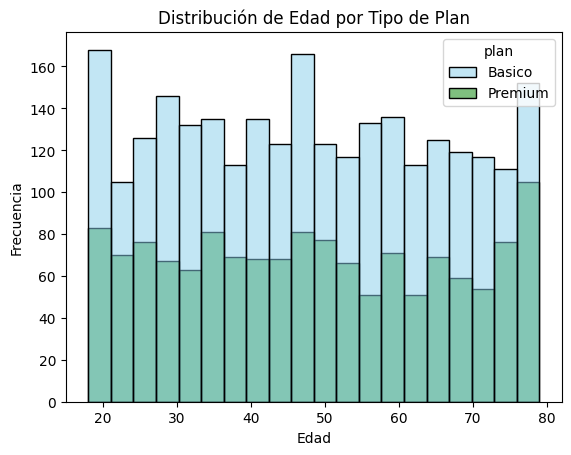

In [37]:

# Histograma para visualizar la edad (age)

sns.histplot(
    data=user_profile,
    x="age",
    hue="plan",
    palette=["skyblue","green"],
    bins=20
)

plt.title("Distribución de Edad por Tipo de Plan")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

💡Insights:
La distribución de edad es bastante uniforme entre los 20 y los 80 años. No se observa un grupo de edades dominante ni picos muy pronunciados. Además, el comportamiento entre plan Básico y Premium es muy similar.
No hay una concentración clara de jóvenes o adultos mayores en alguno de los planes. El tipo de plan no parece estar determinado por la edad. Ambos planes tienen una base de edades parecida, por lo que la segmentación comercial probablemente no está enfocada en edad sino en patrones de consumo.

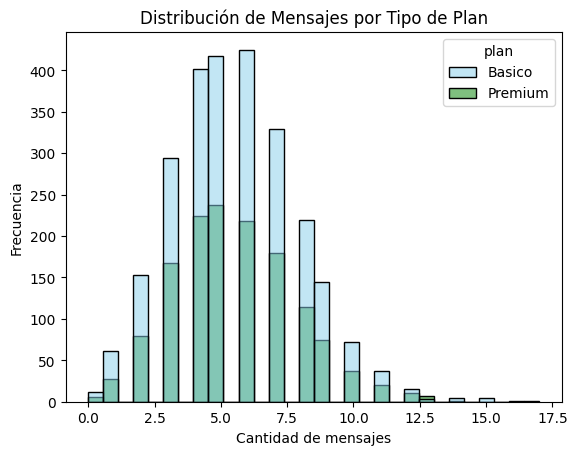

In [38]:
# Histograma para visualizar la cant_mensajes

sns.histplot(
    data=user_profile,
    x="cant_mensajes",
    hue="plan",
    palette=["skyblue","green"],
    bins=30
)

plt.title("Distribución de Mensajes por Tipo de Plan")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Frecuencia")
plt.show()


💡Insights:
La mayoría de usuarios, independientemente del plan, envía entre 3 y 7 mensajes. La distribución presenta un ligero sesgo a la derecha, con pocos usuarios enviando cantidades mucho mayores. Visualmente, ambos planes muestran una forma de distribución muy similar. No se observa un desplazamiento claro del plan Premium hacia niveles más altos de envío de mensajes. En otras palabras, el comportamiento de mensajería parece bastante homogéneo entre los dos planes.

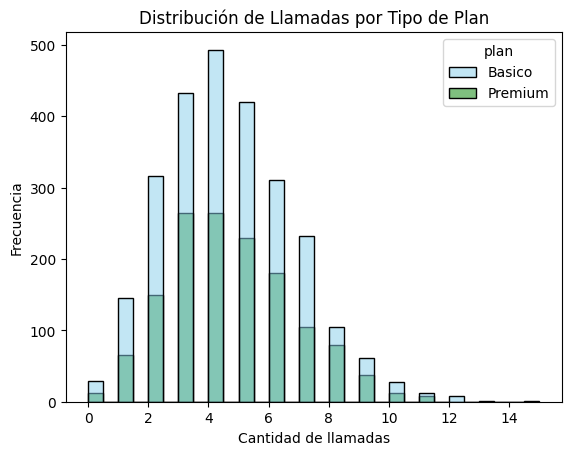

In [39]:
# Histograma para visualizar la cant_llamadas
sns.histplot(
    data=user_profile,
    x="cant_llamadas",
    hue="plan",
    palette=["skyblue","green"],
    bins=30
)

plt.title("Distribución de Llamadas por Tipo de Plan")
plt.xlabel("Cantidad de llamadas")
plt.ylabel("Frecuencia")
plt.show()

💡Insights:
La mayoría de usuarios realiza entre 2 y 6 llamadas. La distribución también muestra un leve sesgo a la derecha, con algunos usuarios que superan las 10 llamadas.

Ese patrón es muy similar en ambos planes. No se observa un desplazamiento claro del plan Premium hacia mayores cantidades de llamadas. El número de llamadas no parece diferenciar significativamente a los usuarios por tipo de plan.

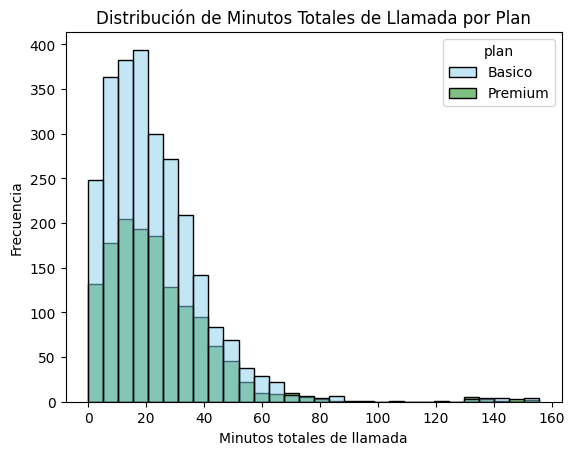

In [40]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(
    data=user_profile,
    x="cant_minutos_llamada",
    hue="plan",
    palette=["skyblue","green"],
    bins=30
)

plt.title("Distribución de Minutos Totales de Llamada por Plan")
plt.xlabel("Minutos totales de llamada")
plt.ylabel("Frecuencia")
plt.show()

💡Insights:

La distribución está claramente sesgada a la derecha. La mayoría de usuarios se concentra entre 5 y 40 minutos totales, pero existe un grupo pequeño con consumos mucho mayores (incluso superiores a 100 minutos).

El comportamiento general es similar entre planes. No se aprecia una separación clara donde Premium concentre los mayores consumos. Ambos planes muestran usuarios de alto consumo. Aunque existen usuarios intensivos en minutos, estos no parecen estar concentrados exclusivamente en el plan Premium. Esto podría indicar que algunos usuarios de alto consumo permanecen en el plan Básico, lo que abre una posible oportunidad comercial de oferta comercial para ese plan.


### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.


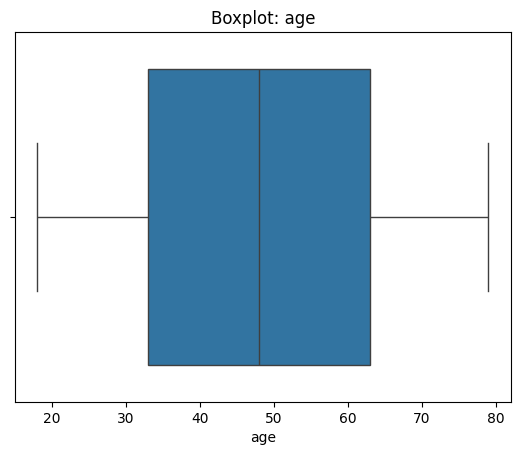

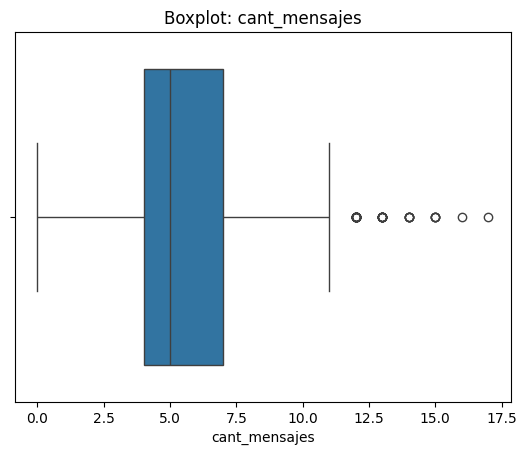

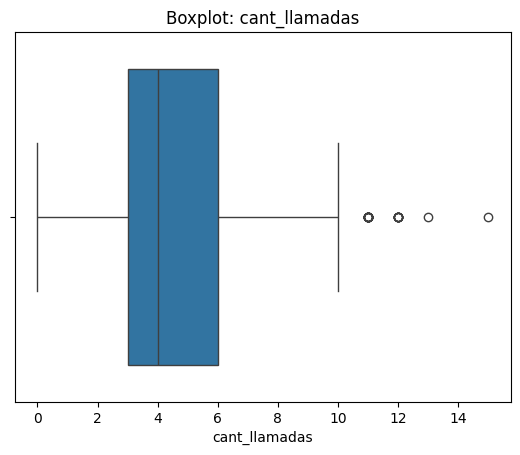

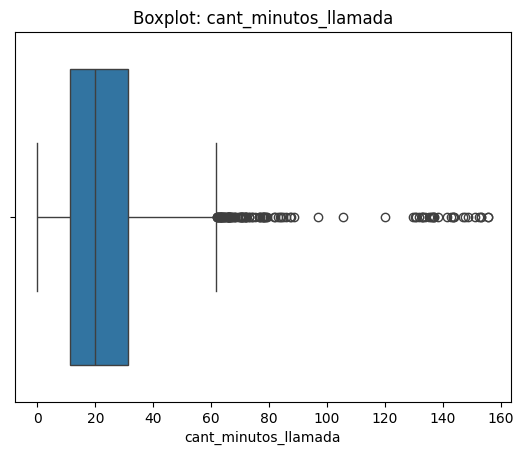

In [41]:

# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(data=user_profile, x=col)
    plt.title(f'Boxplot: {col}')
    plt.show()



💡Insights:
- Age:
No aparecen puntos fuera de los bigotes. El rango va aproximadamente de 18 a 79 años. La mediana está cerca de los 48–50 años. La distribución es bastante equilibrada. Los valores se encuentran dentro de un rango coherente. No se observan outliers en edad.

- cant_mensajes:
Se observan varios puntos fuera del bigote superior. Los valores extremos están entre 12 y 17 mensajes. No hay outliers por debajo. Sí existen outliers en la parte superior. Corresponden a usuarios que envían significativamente más mensajes que la mayoría. Sin embargo, estos valores no parecen errores, sino usuarios más activos.

- cant_llamadas:
También presenta outliers en la parte superior. Valores extremos alrededor de 11 a 15 llamadas aprox. No hay outliers inferiores. Se observan algunos usuarios con número de llamadas superior al rango típico. No parecen valores imposibles ni errores de captura. Probablementr usuarios más activos.

- cant_minutos_llamada:
Hay varios valores de outliers por encima de 60 minutos. Algunos superan incluso los 140–150 minutos. La distribución es muy sesgada a la derecha. Se aprecia una cantidad considerable de outliers superiores. Sin embargo, representan usuarios de alto consumo que pueden ser importantes para el negocio.


In [42]:

# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5 * IQR

    print(f"\nColumna: {col}")
    print(f"Límite superior IQR: {limite_superior}")
    print(f"Máximo real: {user_profile[col].max()}")



Columna: cant_mensajes
Límite superior IQR: 11.5
Máximo real: 17.0

Columna: cant_llamadas
Límite superior IQR: 10.5
Máximo real: 15.0

Columna: cant_minutos_llamada
Límite superior IQR: 61.8575
Máximo real: 155.69


In [43]:

# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()


,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000



💡Insights:
- cant_mensajes:
- Aunque existen valores superiores al límite IQR, estos representan usuarios intensivos reales y no errores de captura. La decisión es mantener outliers. Son comportamiento legítimo.

- cant_llamadas: Los valores altos están dentro de lo posible para un usuario activo. No parecen errores ni inconsistencias. Mantener outliers.
-
- cant_minutos_llamada: Se observan usuarios con minutos significativamente altos, pero no lucen imposibles. Mantener outliers, ya que representan segmentos relevantes para el negocio.

No se calculo límite inferior porque visualmente no hay outliers por debajo y la distribución está sesgada a la derecha.

En general los outliers identificados corresponden a usuarios de alto consumo y no a errores de datos. Eliminarlos distorsionaría el análisis, especialmente porque uno de los objetivos del proyecto es detectar patrones de uso con diferencias marcadas.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [44]:
# Crear columna grupo_uso
def clasificar_usuario(row):
    if row["cant_llamadas"] < 5 and row["cant_mensajes"] < 5:
        return "Bajo uso"
    elif row["cant_llamadas"] < 10 and row["cant_mensajes"] < 10:
        return "Uso medio"
    else:
        return "Alto uso"

user_profile["grupo_uso"] = user_profile.apply(clasificar_usuario, axis=1)

In [45]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [46]:
# Crear columna grupo_edad
def clasificar_edad(row):
    if row["age"] < 30:
        return "Joven"
    elif row["age"] < 60:
        return "Adulto"
    else:
        return "Adulto Mayor"

user_profile["grupo_edad"] = user_profile.apply(clasificar_edad, axis=1)

In [47]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


In [48]:
user_profile["grupo_edad"].value_counts(normalize=True)

,proportion
grupo_edad,
Adulto,0.5045
Adulto Mayor,0.3055
Joven,0.1900


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

/tmp/ipython-input-4248199051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


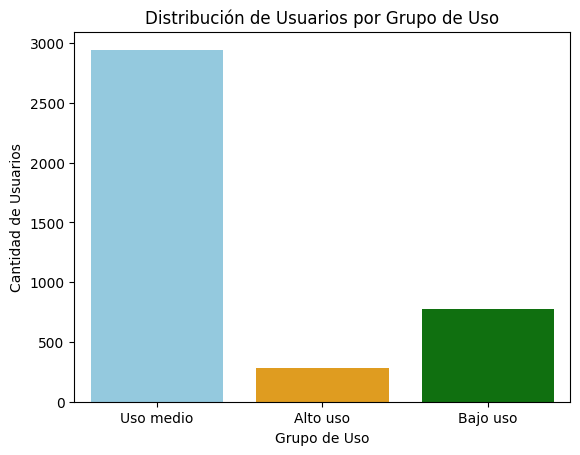

In [49]:
# Visualización de los segmentos por uso
sns.countplot(
    data=user_profile,
    x="grupo_uso",
    palette=["skyblue", "orange", "green"]
)

plt.title("Distribución de Usuarios por Grupo de Uso")
plt.xlabel("Grupo de Uso")
plt.ylabel("Cantidad de Usuarios")
plt.show()

/tmp/ipython-input-393367249.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


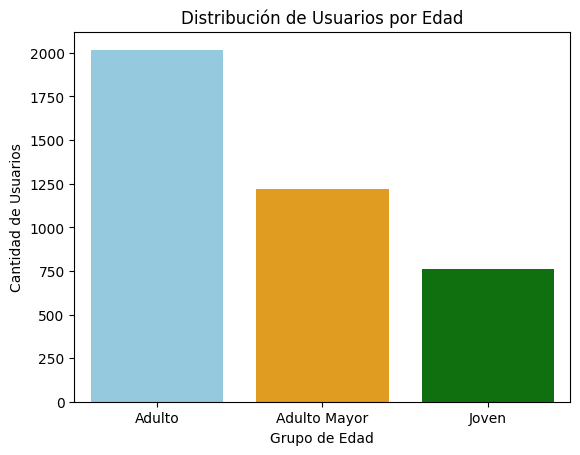

In [50]:
# Visualización de los segmentos por edad
sns.countplot(
    data=user_profile,
    x="grupo_edad",
    palette=["skyblue", "orange", "green"]
)

plt.title("Distribución de Usuarios por Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad de Usuarios")
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?

- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**

Encontré algunos problemas puntuales:
En la columna age existía un valor sentinel (-999) que representaba un error de captura. Fue reemplazado por la mediana.
La columna city tenía valores “?” que fueron tratados como nulos.
En churn_date, más del 88% eran nulos, lo cual no era un error sino que representaba usuarios activos.
En la tabla de usage, los nulos en duration y length no eran errores: dependían del tipo de evento (llamada o mensaje). Es decir, eran datos no aplicables, no datos faltantes reales.


🔍 **Segmentos por Edad**

Identifiqué tres grupos por nivel de uso:
- Bajo uso: pocos mensajes y pocas llamadas.
- Uso medio: el grupo más grande; representa la mayoría de clientes.
- Alto uso: un grupo menor, pero con consumo significativamente superior.

Por edad, la mayor concentración está en el grupo Adulto (30–59 años). No encontré diferencias notorias en comportamiento por edad; el consumo no está claramente determinado por los bloques de edades.Lo más interesante es que los patrones de uso (mensajes y llamadas) son bastante similares entre planes Básico y Premium. No hay una separación clara que indique que el plan Premium concentra exclusivamente a los usuarios más intensivos.


📊 **Segmentos por Nivel de Uso**

Desde el punto de vista del negocio, el grupo de Alto uso es estratégico. Aunque es más pequeño en proporción, concentra mayor consumo y, potencialmente, mayor ingreso por cliente. Estos usuarios son candidatos naturales para:

- Programas de fidelización.
- Ofertas personalizadas.
- Migraciones hacia otros planes VIP con otros margenes de ganancia.

También es relevante analizar si algunos usuarios de alto consumo están en el plan Básico, ya que podrían estar pagando valores excedentes.

**Patrones de uso extremo (outliers)**

Encontré usuarios con:
- Alta cantidad de mensajes.
- Alto número de llamadas.
- Minutos acumulados muy superiores al promedio.

No parecen errores de datos. Son usuarios intensivos reales. Esto no es un problema de calidad, sino una señal de que existen perfiles de consumo muy distintos dentro de la base de clientes. Ignorar estos casos sería desechar información valiosa.

💡 **Recomendaciones**
- Analizar si los usuarios de alto consumo están en el plan adecuado. Puede haber oportunidad de migración a planes más rentables.
- El grupo de uso medio es el más grande. Preparar ofertas intermedias para optimizar este segmento puede tener gran impacto.
- Considerar beneficios adicionales o paquetes premium enfocados en quienes superan ciertos niveles de minutos o llamadas.
- El comportamiento de uso es más determinante que la edad. Las campañas de retención deberían centrarse más en el nivel de consumo que en grupo de edades.


---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.

### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---


Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---


Link a repositorio público del proyecto: `LINK a tu repo aquí`